In [1]:
import pandas as pd

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [2]:
y = pd.read_csv('AAPL_quarterly_financials.csv')
y.head()

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
0,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
1,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
2,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
y.index = y.name

In [4]:
#y.loc['BasicEPS', :]

In [5]:
y = pd.DataFrame(y.loc['BasicEPS', :]).iloc[2:,:]

In [6]:
y.index = pd.to_datetime(y.index)

In [7]:
#Check if NAS are no dividend period
y = y.sort_index().fillna(0.)

In [8]:
y

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [9]:
from pytrends.request import TrendReq

In [10]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Recession","Samsung", "Interest Rates", "New Phone", "phone repair","Buy iphone", "Sell iphone","Taylor Swift","UCLA","Hospitals"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2023-09-30'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [11]:
df

,iPhone,Recession,Samsung,Interest Rates,New Phone,phone repair,Buy iphone,Sell iphone,Taylor Swift,UCLA,Hospitals
date,,,,,,,,,,,
2004-01-01,0,8,27,58,48,17,0,1,0,90,100
2004-02-01,0,7,22,57,45,18,0,0,0,86,90
2004-03-01,0,7,23,66,43,13,0,0,0,84,83
2004-04-01,0,9,23,72,48,16,0,4,0,100,96
2004-05-01,0,8,23,65,47,16,0,0,0,79,87
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,48,32,52,76,71,55,24,24,69,31,30
2023-06-01,48,26,55,74,71,57,24,25,85,26,30
2023-07-01,50,20,57,77,76,62,24,29,90,23,29


In [12]:
#3 no impact keywords

In [13]:
df = df.resample("Q").mean()
df = df.loc[start_date: end_date]

In [14]:
df

,iPhone,Recession,Samsung,Interest Rates,New Phone,phone repair,Buy iphone,Sell iphone,Taylor Swift,UCLA,Hospitals
date,,,,,,,,,,,
2004-03-31,0.000000,7.333333,24.000000,60.333333,45.333333,16.000000,0.000000,0.333333,0.000000,86.666667,91.000000
2004-06-30,0.000000,7.666667,24.000000,67.000000,48.333333,16.333333,0.333333,1.333333,0.000000,85.000000,93.000000
2004-09-30,0.000000,6.000000,26.333333,53.000000,49.000000,17.666667,0.000000,0.000000,0.000000,75.333333,94.000000
2004-12-31,0.000000,7.333333,29.333333,46.666667,45.000000,14.666667,0.333333,0.000000,0.000000,83.000000,81.000000
2005-03-31,0.000000,6.000000,27.666667,49.000000,43.333333,14.666667,0.000000,0.666667,0.000000,81.666667,88.333333
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,55.666667,56.333333,59.333333,75.333333,91.333333,66.000000,34.333333,31.000000,20.333333,32.000000,31.000000
2022-12-31,51.333333,48.333333,57.333333,80.000000,74.333333,55.666667,34.000000,29.333333,44.333333,39.666667,29.000000
2023-03-31,49.333333,36.666667,57.000000,86.000000,76.333333,56.333333,27.000000,27.333333,34.666667,43.000000,31.666667


# 2.) Normalize all the X data

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_scaled =scaler.fit_transform(df)

In [18]:
X_scaled

array([[-1.82695674e+00, -7.61852624e-01, -1.77276243e+00,
         1.07294068e+00, -9.30371638e-01, -1.10841737e+00,
        -1.76823530e+00, -1.48432363e+00, -1.33087196e+00,
         2.03041843e+00,  2.42144217e+00],
       [-1.82695674e+00, -7.42015328e-01, -1.77276243e+00,
         1.60890219e+00, -7.44192569e-01, -1.09619957e+00,
        -1.74921684e+00, -1.42305844e+00, -1.33087196e+00,
         1.93092515e+00,  2.53094070e+00],
       [-1.82695674e+00, -8.41201810e-01, -1.64848027e+00,
         4.83383011e-01, -7.02819442e-01, -1.04732837e+00,
        -1.76823530e+00, -1.50474536e+00, -1.33087196e+00,
         1.35386417e+00,  2.58568997e+00],
       [-1.82695674e+00, -7.61852624e-01, -1.48868894e+00,
        -2.57804273e-02, -9.51058202e-01, -1.15728857e+00,
        -1.74921684e+00, -1.50474536e+00, -1.33087196e+00,
         1.81153323e+00,  1.87394952e+00],
       [-1.82695674e+00, -8.41201810e-01, -1.57746190e+00,
         1.61806103e-01, -1.05449102e+00, -1.15728857e+00,
  

In [19]:
#y.isna().any()

In [20]:
#y.fillna(0.)

# 3.) Import data. Train, Test, Holdout (80%,15%,5%)

In [21]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [22]:
#X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
#X_test, X_holdout, y_test, y_holdout = train_test_split(X_temp, y_temp, test_size = 0.75, random_state = 42)

# 4.) Run a Lasso with lambda of .5. Plot a bar chart.

In [24]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso(alpha =0.25)
y = y.loc[start_date: end_date]
#X_scaled = X_scaled.loc[start_date: end_date]

In [36]:
lasso.fit(X_scaled,y)

Lasso(alpha=0.25)

In [37]:
coefficients = lasso.coef_

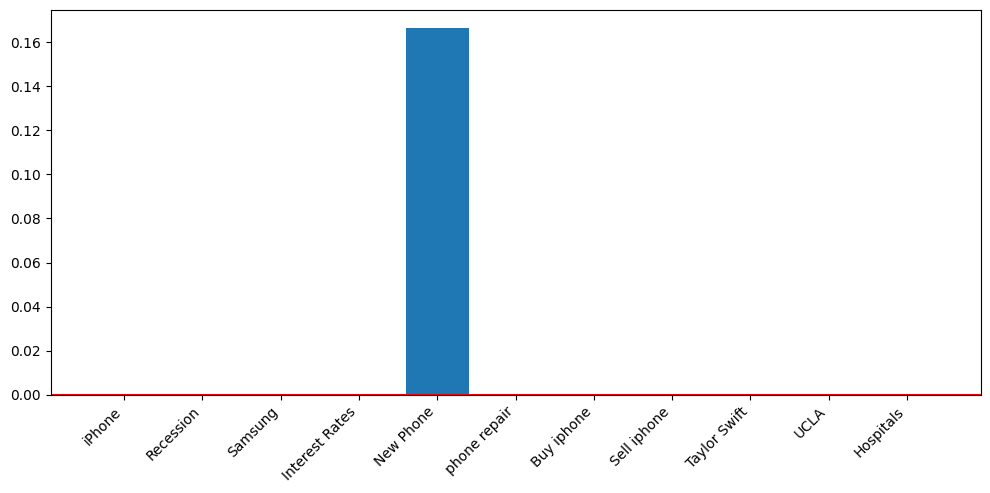

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12,5))
plt.bar(range(len(coefficients)),coefficients)
plt.xticks(range(len(coefficients)), df.columns, rotation=45, ha='right')
plt.axhline(0,color = "red")
plt.show()

# 5.) Do these coefficient magnitudes make sense?

In [ ]:
##Doesn't make sense.

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?